In [60]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
from sklearn.model_selection import train_test_split

def visualize_precision_and_recall(precision_train, recall_train, precision_test, recall_test):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(precision_train, recall_train, c='blue', marker='o')
    
    plt.scatter(precision_test, recall_test, c='red', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt


In [61]:
def calculate_precision_recall_test_data(box, x_test, y_test):

    lims = box.box_lims
    
    is_within_limits = True
    
    precision_test = []
    recall_test = []
    
    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0


    #iterate over limit entries which is list of dataframes
    for z in range(len(lims)):
        # Iterate over each row of temp_data
        for row_index, row in x_test.iterrows():
            is_within_limits = True
            a = 0
            # Check if entry lies within the specified limits
            for column, value in row.iteritems():
                is_within_limits = (lims[z].iloc[0, a] <= value <= lims[z].iloc[1, a]) & is_within_limits
                a = a + 1
            
            if is_within_limits & (y_test[row_index] == 1):
                tp = tp + 1
            if is_within_limits & (y_test[row_index] == 0):
                fp = fp + 1
            if (is_within_limits == False) & (y_test[row_index] == 0):
                tn = tn + 1
            if (is_within_limits == False) & (y_test[row_index] == 1):
                fn = fn + 1
                
        precision = recall = 0  # Default values
    
        if (tp + fp) > 0:
            precision = tp / (tp + fp)
        if (tp + fn) > 0:
            recall = tp / (tp + fn)
    
        precision_test.append(precision)
        recall_test.append(recall)
            
    return precision_test, recall_test
        
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

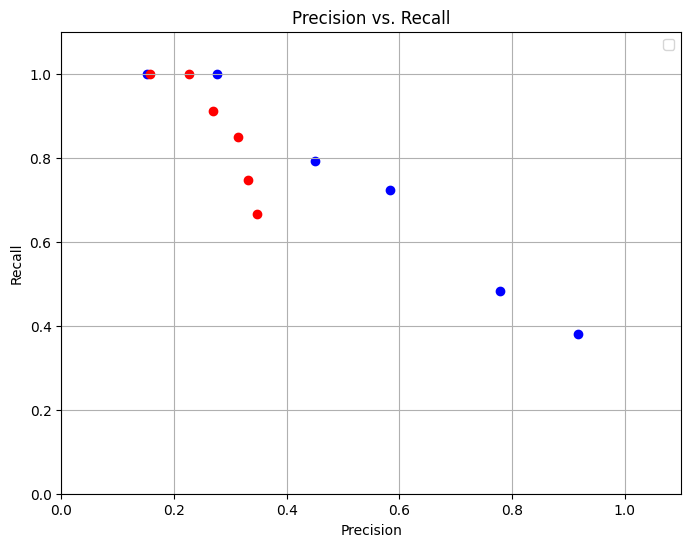

In [81]:
import pandas as pd
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec_train = []
rec_train = []

prec_test = []
rec_test = []

sample_train, sample_test = train_test_split(data, test_size=0.33, stratify=data['SSP1'])
        
sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

y = sample_train['SSP1']
temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x = temp_data.values
            
y_test = sample_test['SSP1']
temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x_test = temp_data.values

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

for index, row in box1.peeling_trajectory.iterrows():
    rec_train.append(row['coverage'])
    prec_train.append(row['density'])
    
prec_test, rec_test = calculate_precision_recall_test_data(box1, temp_data, y_test)
    
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

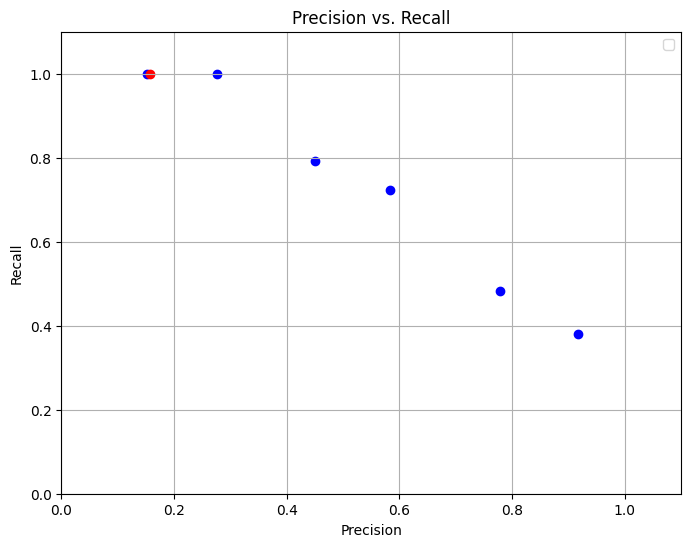

In [88]:
#duplicate 1 in each box
lims = box1.box_lims

prec_train = []
rec_train = []

for index, row in box1.peeling_trajectory.iterrows():
    rec_train.append(row['coverage'])
    prec_train.append(row['density'])

prec_test = []
rec_test = []

sample_train, sample_test = train_test_split(data, test_size=0.33, stratify=data['SSP1'])
        
sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

y = sample_train['SSP1']
new_labels = y
temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
new_data = temp_data
x = temp_data.values
            
y_test = sample_test['SSP1']
temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x_test = temp_data.values

#iterate over limit entries which is list of dataframes
for i in range(len(lims)):
    # Iterate over each row of temp_data
    for index, row in temp_data.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (lims[i].iloc[0, a] <= value <= lims[i].iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            new_data.loc[len(new_data)] = row
            new_labels.loc[len(y)] = y[index]

prim_alg2 = prim.Prim(new_data.values, new_labels, threshold=0.8, peel_alpha=0.1)
box2 = prim_alg2.find_box()
    
prec_test, rec_test = calculate_precision_recall_test_data(box2, temp_data, y_test)

visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

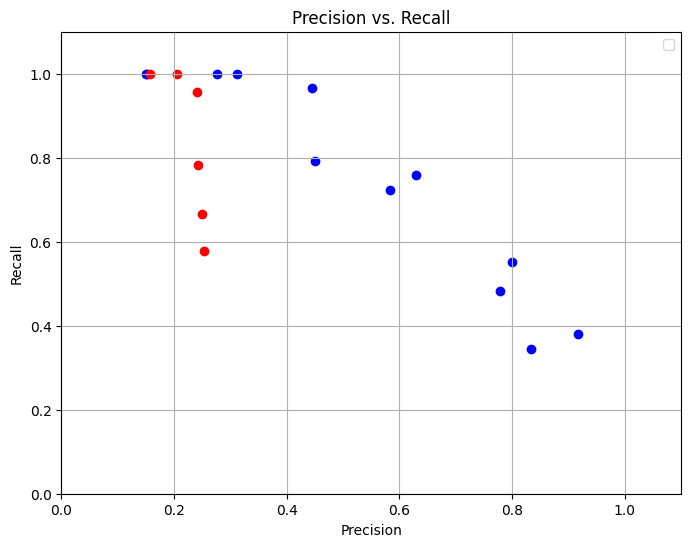

In [84]:
#duplicate 1 in each box
lims = box1.box_lims

prec_train = []
rec_train = []

for index, row in box1.peeling_trajectory.iterrows():
    rec_train.append(row['coverage'])
    prec_train.append(row['density'])

prec_test = []
rec_test = []

sample_train, sample_test = train_test_split(data, test_size=0.33, stratify=data['SSP1'])
        
sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

y = sample_train['SSP1']
new_labels = y
temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
new_data = temp_data
x = temp_data.values
            
y_test = sample_test['SSP1']
temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
x_test = temp_data.values

# Iterate over each row of temp_data
for index, row in temp_data.iterrows():
    is_within_limits = True
    a = 0
    # Check if entry lies within the specified limits
    for column, value in row.iteritems():
        is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[1, a]) & is_within_limits
        a = a + 1
    if is_within_limits:
        new_data.loc[len(new_data)] = row
        new_labels.loc[len(y)] = y[index]

prim_alg3 = prim.Prim(new_data.values, new_labels, threshold=0.8, peel_alpha=0.1)
box3 = prim_alg3.find_box()

for index, row in box3.peeling_trajectory.iterrows():
    rec_train.append(row['coverage'])
    prec_train.append(row['density'])
    
prec_test, rec_test = calculate_precision_recall_test_data(box3, temp_data, y_test)
    
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)